# GMOT runtime as function of number of vertices

In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
from pkg.gmp import quadratic_assignment
from pkg.gmp import quadratic_assignment_ot
from pkg.plot import set_theme
import numpy as np

In [3]:
# hide
import sys
sys.path
sys.path.insert(0,'../../graspologic')

In [12]:
import time
from graspologic.simulations import er_np
nodes = np.linspace(200, 2000, 10)
reps = 50
times_sgm = np.zeros((len(nodes),reps))
times_sgmls = np.zeros((len(nodes),reps))
acc_sgm = np.zeros((len(nodes),reps))
acc_sgmls = np.zeros((len(nodes),reps))
for i,n in enumerate(nodes):
    n = int(n)
    p = np.log(n)/n
    for t in range(reps):
        G = er_np(n,p)
        options = {'maximize':True, 'tol':1e-6,'maxiter':30, 'rng': i*reps + t,'shuffle_input':True}
        
        start = time.time()
        res = quadratic_assignment(G,G, options=options)
        times_sgm[i,t] = time.time()-start
        acc_sgm[i,t] = np.mean(res.col_ind == np.arange(n))
        
        start = time.time()
        res = quadratic_assignment_ot(G,G, options={'maximize':True, 'tol':1e-6,'maxiter':30, 'rng': i*reps + t,'shuffle_input':True,'reg': 200, 'sinkh':'ot'})
        times_sgmls[i,t] = time.time()-start
        acc_sgmls[i,t] = np.mean(res.col_ind == np.arange(n))

## GMOT vs FAQ runtime (5 reps, re-run with more)
### Caption: 
Running time and performance of FAQ and GOAT as a function of number of nodes, $n$. Data sampled from Erdos-Reyni model, with $\rho = {log(n) \over n}$, with 50 simulations per $n$.  


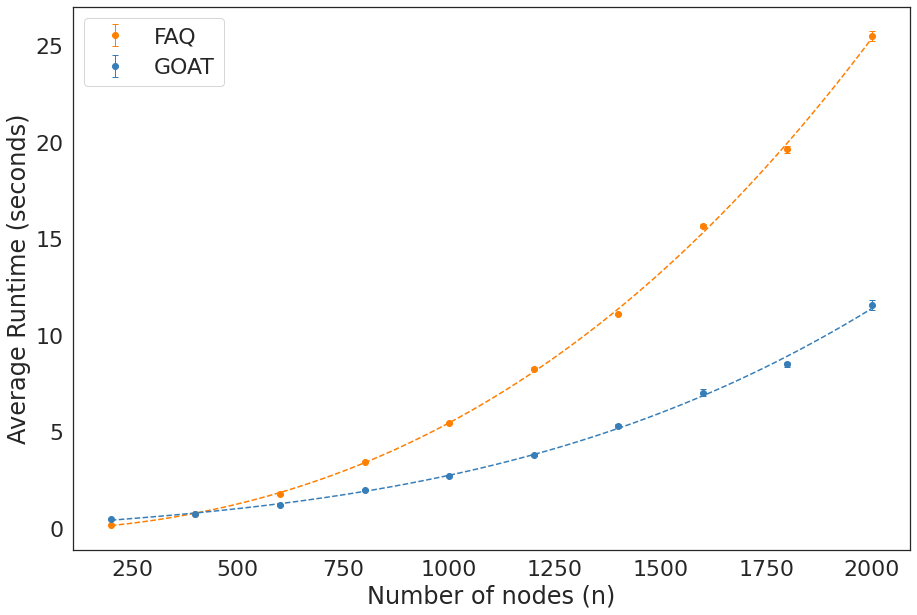

In [92]:
import matplotlib.pyplot as plt
from scipy.stats import sem
import seaborn as sns

cb = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
pgm = np.poly1d(np.polyfit(nodes,np.mean(times_sgm, axis=1),3))
pgmls = np.poly1d(np.polyfit(nodes,np.mean(times_sgmls, axis=1),3))
xp = np.linspace(200, 2000, 100)
sns.set_context('poster')
sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale = 2)
sns.set_style('white')
plt.errorbar(nodes,np.mean(times_sgm, axis=1), sem(times_sgm, axis=1),fmt='o',capsize=3, elinewidth=1, markeredgewidth=1, label=f'FAQ',color=cb[1])
plt.errorbar(nodes,np.mean(times_sgmls, axis=1), sem(times_sgmls, axis=1),fmt='o',capsize=3, elinewidth=1, markeredgewidth=1, label=f'GOAT',color=cb[0])
plt.plot(xp,pgm(xp), '--',color=cb[1],)
plt.plot(xp,pgmls(xp),'--',color=cb[0])
# plt.text(1000,20,fr'${s}$')
plt.xlabel("Number of nodes (n)")

plt.ylabel("Average Runtime (seconds)")
plt.legend()

## GMOT vs FAQ performance (ER sim)

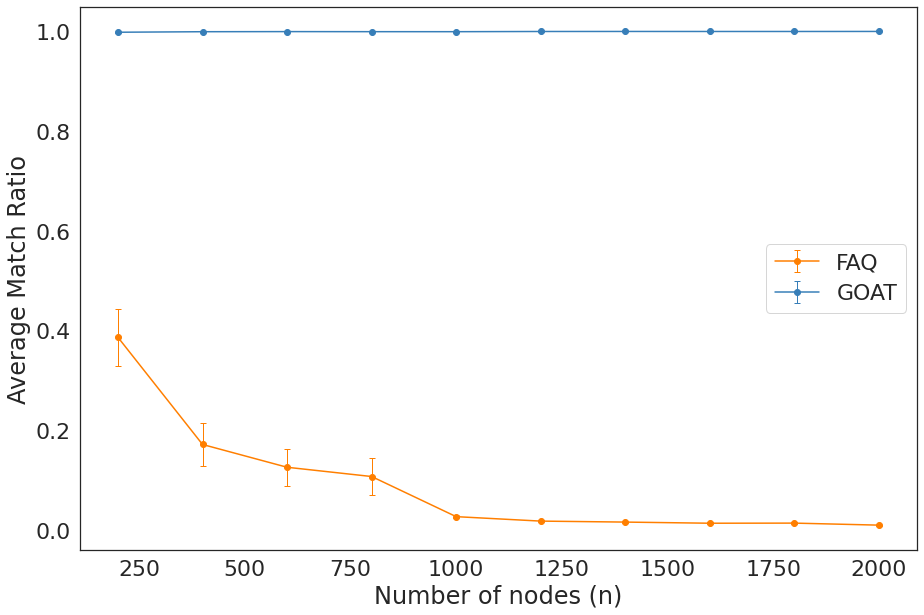

In [94]:
plt.errorbar(nodes,np.mean(acc_sgm, axis=1), sem(acc_sgm, axis=1),marker='o',capsize=3, elinewidth=1, markeredgewidth=1, label=f'FAQ',color=cb[1])
plt.errorbar(nodes,np.mean(acc_sgmls, axis=1), sem(acc_sgmls, axis=1),marker='o',capsize=3, elinewidth=1, markeredgewidth=1, label=f'GOAT',color=cb[0])
# plt.plot(xp,pgm(xp), '--',color='red',)
# plt.plot(xp,pgmls(xp),'--',color='blue')

plt.xlabel("Number of nodes (n)")
plt.ylabel("Average Match Ratio")
# plt.title("ER_np(N, log(N)/N)")
plt.legend()

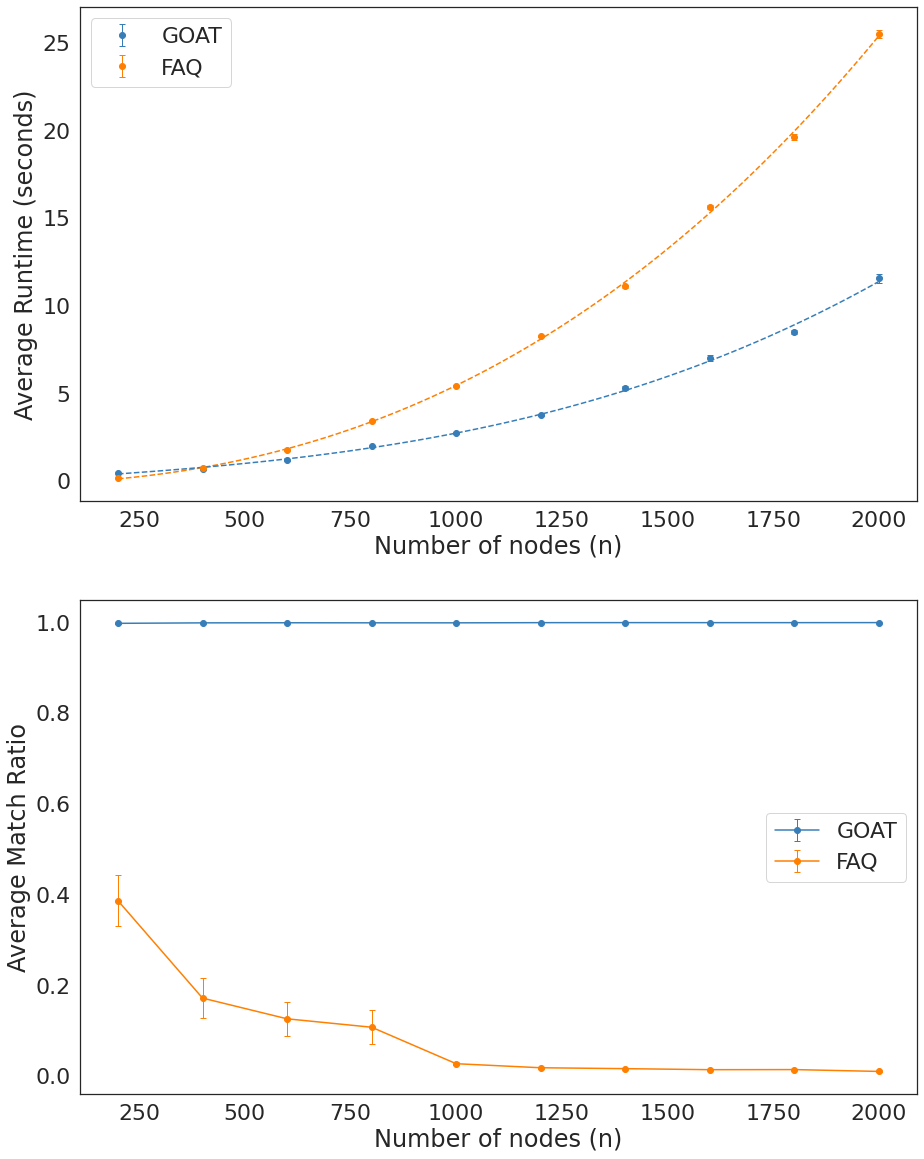

In [100]:
fig, ax = plt.subplots(2)
sns.set_context('paper')
sns.set(rc={'figure.figsize':(15,20)})
sns.set(font_scale = 2)
sns.set_style('white')

ax[0].errorbar(nodes,np.mean(times_sgmls, axis=1), sem(times_sgmls, axis=1),fmt='o',capsize=3, elinewidth=1, markeredgewidth=1, label=f'GOAT',color=cb[0])
ax[0].errorbar(nodes,np.mean(times_sgm, axis=1), sem(times_sgm, axis=1),fmt='o',capsize=3, elinewidth=1, markeredgewidth=1, label=f'FAQ',color=cb[1])
ax[0].plot(xp,pgm(xp), '--',color=cb[1],)
ax[0].plot(xp,pgmls(xp),'--',color=cb[0])
# plt.text(1000,20,fr'${s}$')
ax[0].set_xlabel("Number of nodes (n)")

ax[0].set_ylabel("Average Runtime (seconds)")
ax[0].legend()

ax[1].errorbar(nodes,np.mean(acc_sgmls, axis=1), sem(acc_sgmls, axis=1),marker='o',capsize=3, elinewidth=1, markeredgewidth=1, label=f'GOAT',color=cb[0])
ax[1].errorbar(nodes,np.mean(acc_sgm, axis=1), sem(acc_sgm, axis=1),marker='o',capsize=3, elinewidth=1, markeredgewidth=1, label=f'FAQ',color=cb[1])
# plt.plot(xp,pgm(xp), '--',color='red',)
# plt.plot(xp,pgmls(xp),'--',color='blue')

ax[1].set_xlabel("Number of nodes (n)")
ax[1].set_ylabel("Average Match Ratio")
# plt.title("ER_np(N, log(N)/N)")
ax[1].legend()
plt.savefig('er_time.png')

In [56]:
pgm

poly1d([ 1.03148595e-09,  4.07596636e-06,  4.86703450e-04, -1.32339155e-01])